In [2]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.1 MB/s eta 0:00:00


In [3]:
import pydicom

In [4]:
from pydicom import dcmread


In [5]:
import pydicom.data

In [20]:
path=r"/content"

In [21]:
file_name="00000002.dcm"

In [23]:
file=pydicom.data.data_manager.get_files(path,file_name)[0]

In [24]:
ds=pydicom.dcmread(file)

In [25]:
print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9125.4.0.537874177.151278140.1719838829
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.392.200036.9125.5154.1
(0002,0013) Implementation Version Name         SH: 'V2.0B'
(0002,0016) Source Application Entity Title     AE: 'MEDIA'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'POST_PROCESSED', '', '', '', '', '', '100000']
(0008,0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.392.200036.9125.4.0.537874177.151278140.171

In [26]:
type(ds)


pydicom.dataset.FileDataset

In [27]:
ds[0x0010,0x0010]

(0010,0010) Patient's Name                      PN: 'XYZ'

In [28]:
# changing patient name

In [29]:
ds[0x0010,0x0010].value="abdeen"

In [30]:
ds[0x0010,0x0010]

(0010,0010) Patient's Name                      PN: 'abdeen'

In [31]:
ds[0x0010,0x0020]

(0010,0020) Patient ID                          LO: '1744'

In [32]:
ds[0x0010,0x0020].value="19106051"

In [33]:
ds[0x0010,0x0020]

(0010,0020) Patient ID                          LO: '19106051'

In [34]:
ds[0x0008,0x0060]

(0008,0060) Modality                            CS: 'CR'

In [35]:
ds[0x0008,0x0070]

(0008,0070) Manufacturer                        LO: 'FUJI PHOTO FILM Co., ltd.'

In [36]:
ds[0x0008,0x1050]

(0008,1050) Performing Physician's Name         PN: 'Administrator=???'

In [37]:
#changing pysician's name

In [38]:
ds[0x0008,0x1050].value="mohammed"

In [39]:
ds[0x0008,0x1050]

(0008,1050) Performing Physician's Name         PN: 'mohammed'

In [40]:
ds[0x0008,0x0020]

(0008,0020) Study Date                          DA: '20210226'

In [41]:
#reshaping date

In [42]:
ds[0x0008,0x0020].value="2021/02/26"

/usr/local/lib/python3.10/dist-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR DA: '2021/02/26'.
  warn_and_log(msg)


In [43]:
ds[0x0008,0x0020]

(0008,0020) Study Date                          DA: '2021/02/26'

In [44]:
ds[0x0032,0x0032].value="2021/02/26"

In [45]:
ds[0x0032,0x0032]

(0032,0032) Study Verified Date                 DA: '2021/02/26'

In [53]:
ds[0x0008,0x2111]

(0008,2111) Derivation Description              ST: 'G1.2O#0.90+0.43,MCP1.8AM0.4,C*1.0*1.0'

In [54]:
ds[0x0029,0x1030]

(0029,1030) [Extended Reading Size Value]       CS: '04'

In [55]:
ds[0x2010,0x0040]

(2010,0040) Film Orientation                    CS: 'LANDSCAPE'

In [56]:
ds[0x0028,0x0002]

(0028,0002) Samples per Pixel                   US: 1

In [57]:
ds[0x0028,0x0030]

(0028,0030) Pixel Spacing                       DS: [0.20, 0.20]

In [58]:
ds[0x0028,0x0010],ds[0x0028,0x0011]

((0028,0010) Rows                                US: 2140,
 (0028,0011) Columns                             US: 1760)

In [59]:
import matplotlib.pyplot as plt

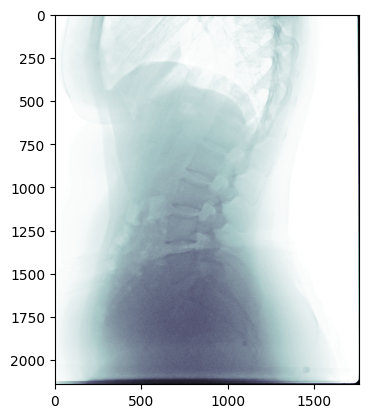

In [60]:
plt.imshow(ds.pixel_array,cmap='bone')

In [61]:
pip install pillow


In [62]:
from PIL import Image



In [63]:
pip install numpy

In [64]:
import numpy as np

In [65]:
#now extracting the pixels from file and turn type to float so we don't lose information

In [66]:
image=ds.pixel_array.astype(float)

In [67]:
#change the size into 0,255

In [83]:
image2=(np.maximum(image,0)/image.max()) *255.0

In [84]:
#changing image to 8 bits unsigned integer

In [85]:
image2=np.uint8(image2)

In [86]:
# creating image fromm array

In [87]:
image3=Image.fromarray(image2)

In [88]:
# show image

In [89]:
image3.show()

In [90]:
#save image as jpg

In [91]:
image3.save('00000002.jpg')

In [92]:
#save image as png

In [93]:
image3.save('00000002.png')